# Replication and Data Analysis - Python

**Paper: "WHAT’S ADVERTISING CONTENT WORTH? EVIDENCE FROM A CONSUMER CREDIT MARKETING FIELD EXPERIMENT" (2010)**

Members: Valeria Hoyos, Alvaro Yllu and Pamela Cubas

In [1]:
# Import relevant packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install econml

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.0 MB 3.3 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.0 MB 3.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.0 MB 3.5 MB/s eta 0:00:01
   ----------------- ---------------------- 0.9/2.0 MB 3.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 3.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 3.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 3.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 2.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 2.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.0 MB 1.8 MB/s eta 0:00:01
   ----------------

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from econml.dml import CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression, Ridge, Lasso, LogisticRegressionCV

In [5]:
url = "https://github.com/gsbDBI/ExperimentData/raw/97a11199ba559f01c7b3803a1493ffa08631732e/Advertising/adcontentworth_qje.csv"
df = pd.read_csv(url)

df['high_risk'] = df['risk'].apply(lambda x: 1 if x == "HIGH" else 0)
df['medium_risk'] = df['risk'].apply(lambda x: 1 if x == "MEDIUM" else 0)
df['race'] = df['race'].apply(lambda x: "black" if x == np.nan else x)
df['black_dummy'] = df['race'].apply(lambda x: 1 if x == "black" else 0)
df.fillna(0, inplace=True)
T = 'high_risk'
Y = 'applied'
X = df.drop(columns=['wave','dormancy','risk','tookup','tookup_after_short','applied_2weeks','tookup_after_med' ,'tookup_after_long','stripany','comp_n','tookup_outside_only','trcount','applied','high_risk','badacct_last','waved3','offer4','race']).columns

df.fillna(0, inplace=True)

In [6]:
df

,wave,dormancy,race,risk,offer4,prize,intshown,trcount,tookup,applied,...,deadlineshortext,tookup_after_short,applied_2weeks,tookup_after_med,tookup_after_long,stripany,comp_n,high_risk,medium_risk,black_dummy
0,2,20,black,HIGH,9.69,1.0,1.0,16.0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,2,16,black,HIGH,3.25,0.0,0.0,5.0,0,0,...,0,0,0,0,0,1,1,1,0,1
2,2,10,black,HIGH,4.44,0.0,1.0,17.0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,2,18,black,HIGH,9.00,0.0,1.0,14.0,0,0,...,0,0,0,0,0,1,1,1,0,1
4,2,13,black,HIGH,9.75,1.0,0.0,14.0,0,0,...,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58163,3,1,black,HIGH,9.99,0.0,1.0,1.0,0,0,...,0,1,0,1,1,1,1,1,0,1
58164,3,1,black,HIGH,10.25,1.0,1.0,1.0,1,1,...,0,0,1,0,0,0,1,1,0,1
58165,3,1,black,HIGH,7.77,0.0,1.0,1.0,1,1,...,0,0,1,0,0,0,1,1,0,1
58166,3,1,black,HIGH,5.55,0.0,1.0,1.0,0,0,...,0,1,0,1,1,1,1,1,0,1


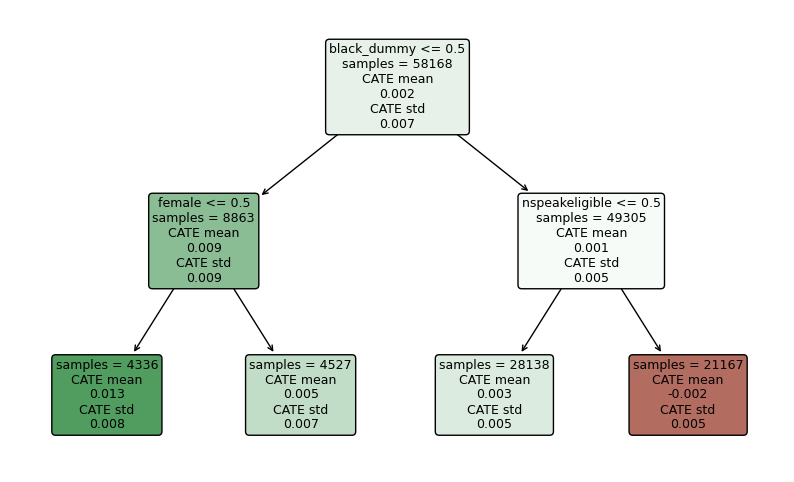

In [9]:
from econml.dml import CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Create and fit the Causal Forest DML model
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=3)
tree_model = tree_model.fit(Y=df[Y], X=df[X], T=df[T])

# Interpret the model with SingleTreeCateInterpreter
intrp = SingleTreeCateInterpreter(max_depth=2)
intrp.interpret(tree_model, df[X])

# Configure the figure and plot size
plt.figure(figsize=(10, 6))

# Plot the tree interpretation
intrp.plot(feature_names=X, fontsize=9)

# Save the plot as a JPG file
plt.savefig('tree_interpreter.jpg')

# Show the plot in the output
plt.show()
